# E2a: Küchentischversuch zum Laval-Rotor

Name: Maurizio Fell 
Datum:  11.01.2023

## Forschungsfrage

Bei diesem Versuch werden die bei Haushaltsgegenständen gemessenen Beschleunigungen ausgewertet. Dabei werden die Beschleunigungswerte in den Frequenzbreich übertragen. 

# Erster Versuch


##  Versuchsaufbau und -durchführung



- Bild von Aufbau des Haushaltsgegenstands:

<img src="Bilder/Versuch1.jpeg" width="500">

- Beschreibung des Aufbaus: Der Beschleunigungssensor, der mit dem Pi verbunden ist, wird mit Klebeband an das Handy befestigt.
- Vorgangsbeschreibung: Die Weckerfunktion wird gestartet und das Messprogramm ebenfalls.

## Versuchsauswertung


In [1]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft


path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [2]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240109_182738_MaurizioFell_handy" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240109_182738_MaurizioFell_handy.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [3]:
"""Prepare Metadata"""

(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240109_182738_MaurizioFell_handy/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240109_182738_MaurizioFell_handy/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240109_182738_MaurizioFell_handy/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaee5c-1817-664d-94f5-57e95384291e": {
    "type": "probe",
    "name": "handy",
    "comment": "",
    "path": "measurement_data/data_2

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [4]:
dataset_path = "{}/{}".format(path_measurement_folder,h5_file_name )
f = h5py.File(dataset_path, "r")

length = len(f["RawData"][sensor_settings_dict["ID"]]["timestamp"])
arraytime = np.zeros(length)
arrayx = np.zeros(length)
arrayy = np.zeros(length)
arrayz = np.zeros(length)
for i in range(length):
    arraytime[i] = f["RawData"][sensor_settings_dict["ID"]]["timestamp"][i]
    arrayx[i] = f["RawData"][sensor_settings_dict["ID"]]["acceleration_x"][i]
    arrayy[i] = f["RawData"][sensor_settings_dict["ID"]]["acceleration_y"][i]
    arrayz[i] = f["RawData"][sensor_settings_dict["ID"]]["acceleration_z"][i]


#### 2. Betrag der Beschleunigung berechnen



In [5]:
betrag = get_vec_accel(arrayx,arrayy,arrayz)
print(betrag)

[11.70807216 11.82829937 11.86674304 ... 11.77830484 11.81997078
 11.73812969]


#### 3. Darstellung der Messdaten


findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


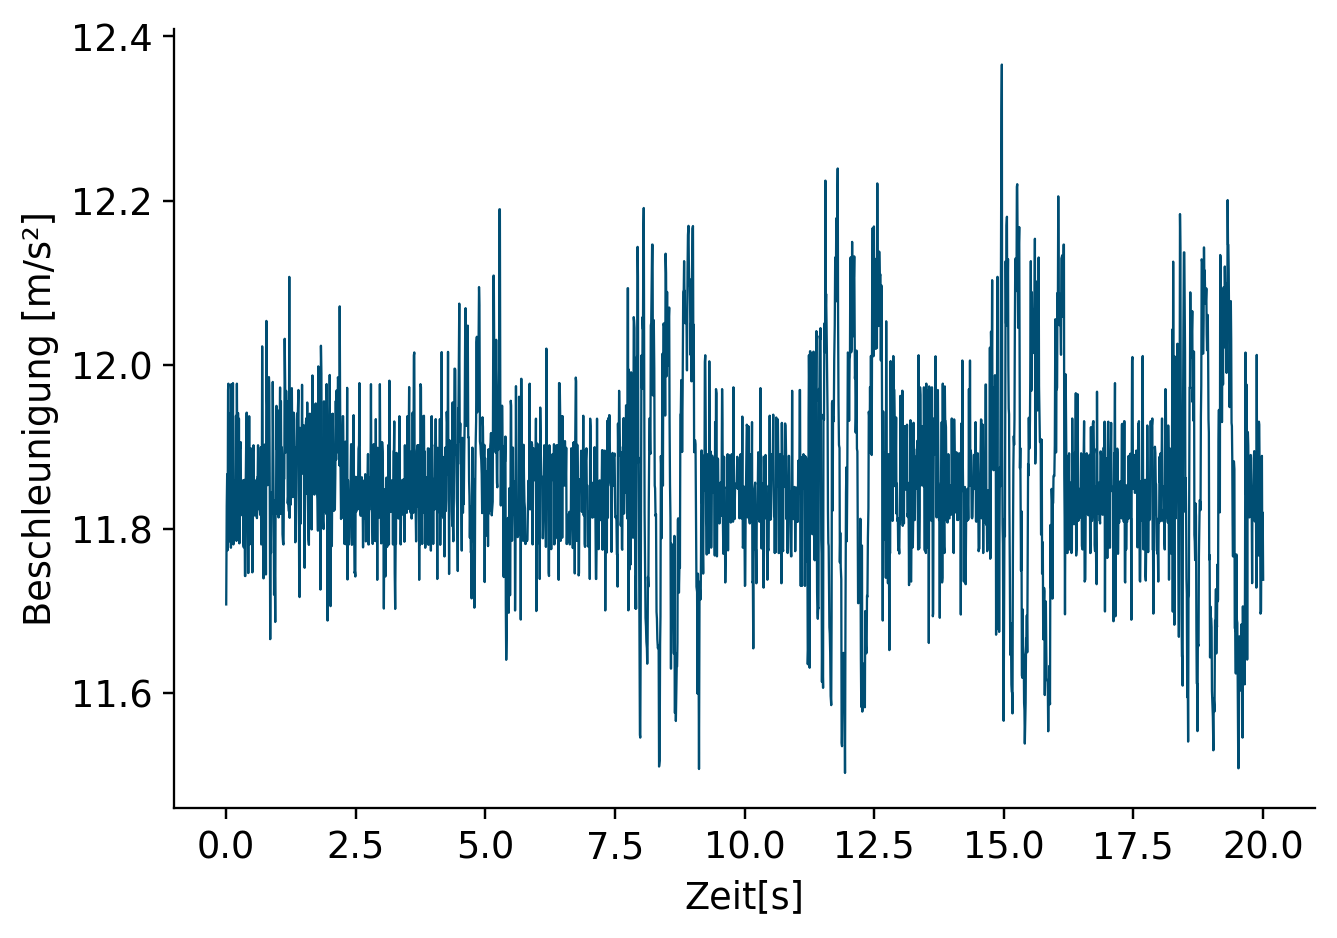

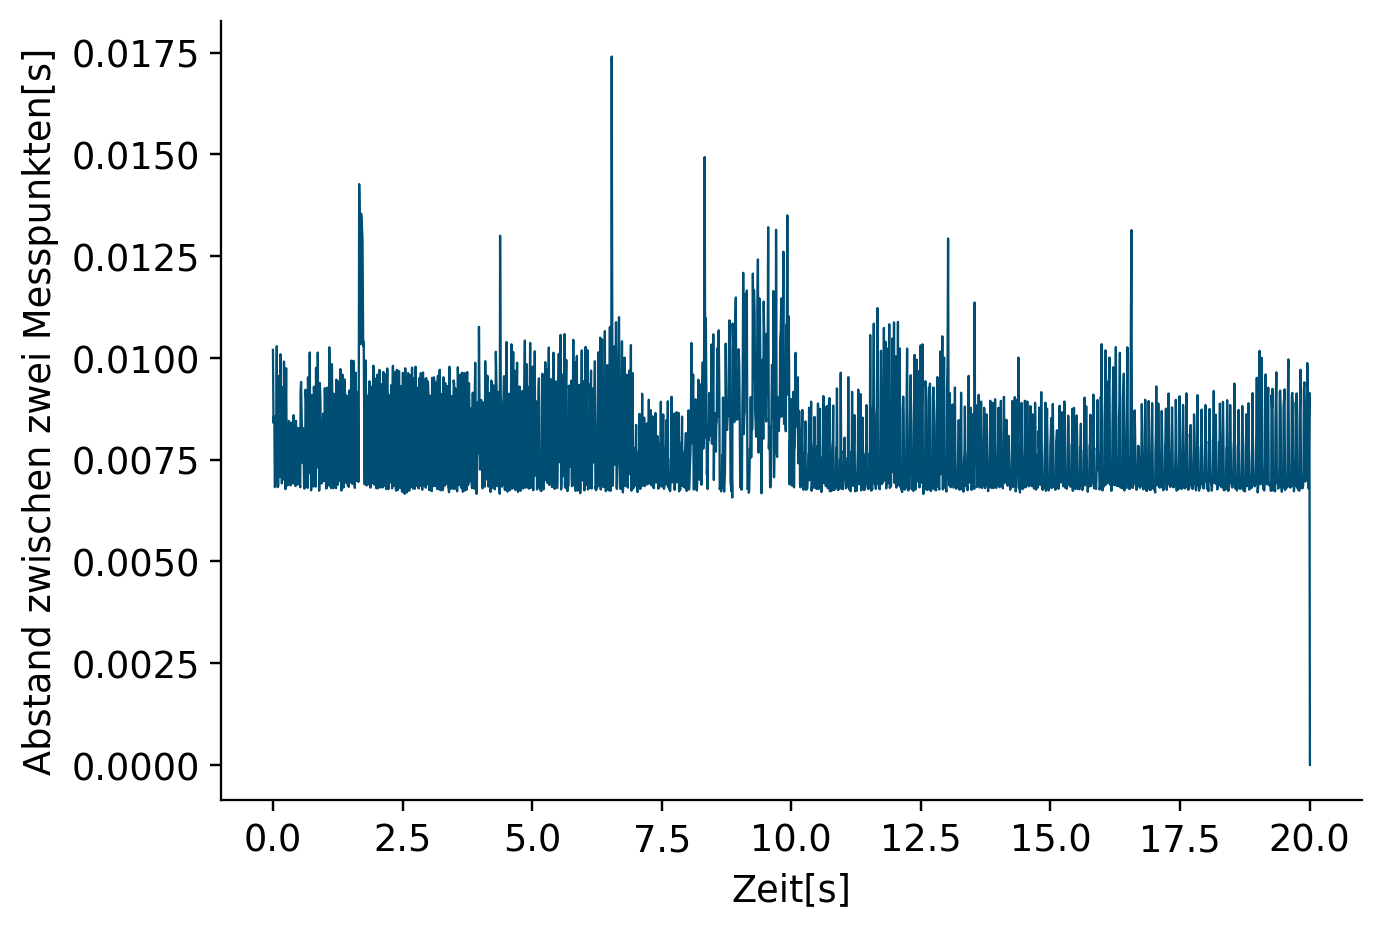

In [6]:
fig, ax = plt.subplots(1, 1)
fig, ax2 = plt.subplots(1, 1)
xlab = "Zeit[s]"
ylab = "Beschleunigung [m/s²]"
xlab2 = "Zeit[s]"
ylab2 = "Abstand zwischen zwei Messpunkten[s]"
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax2.set_xlabel(xlab2)
ax2.set_ylabel(ylab2)
ax.plot(arraytime,betrag)
zabst = np.zeros(length)
for i in range(len(arraytime)):
    if i < len(arraytime)-1:
        zabst[i] = arraytime[i+1]-arraytime[i]
ax2.plot(arraytime, zabst)


#### 4. Interpolation der Messwerte



In [7]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.

interpolwerte = interpolation(arraytime, betrag)
   



#### 5 & 6. FFT durchführen und graphisch darstellen



Text(0, 0.5, 'FFT Amplitude')

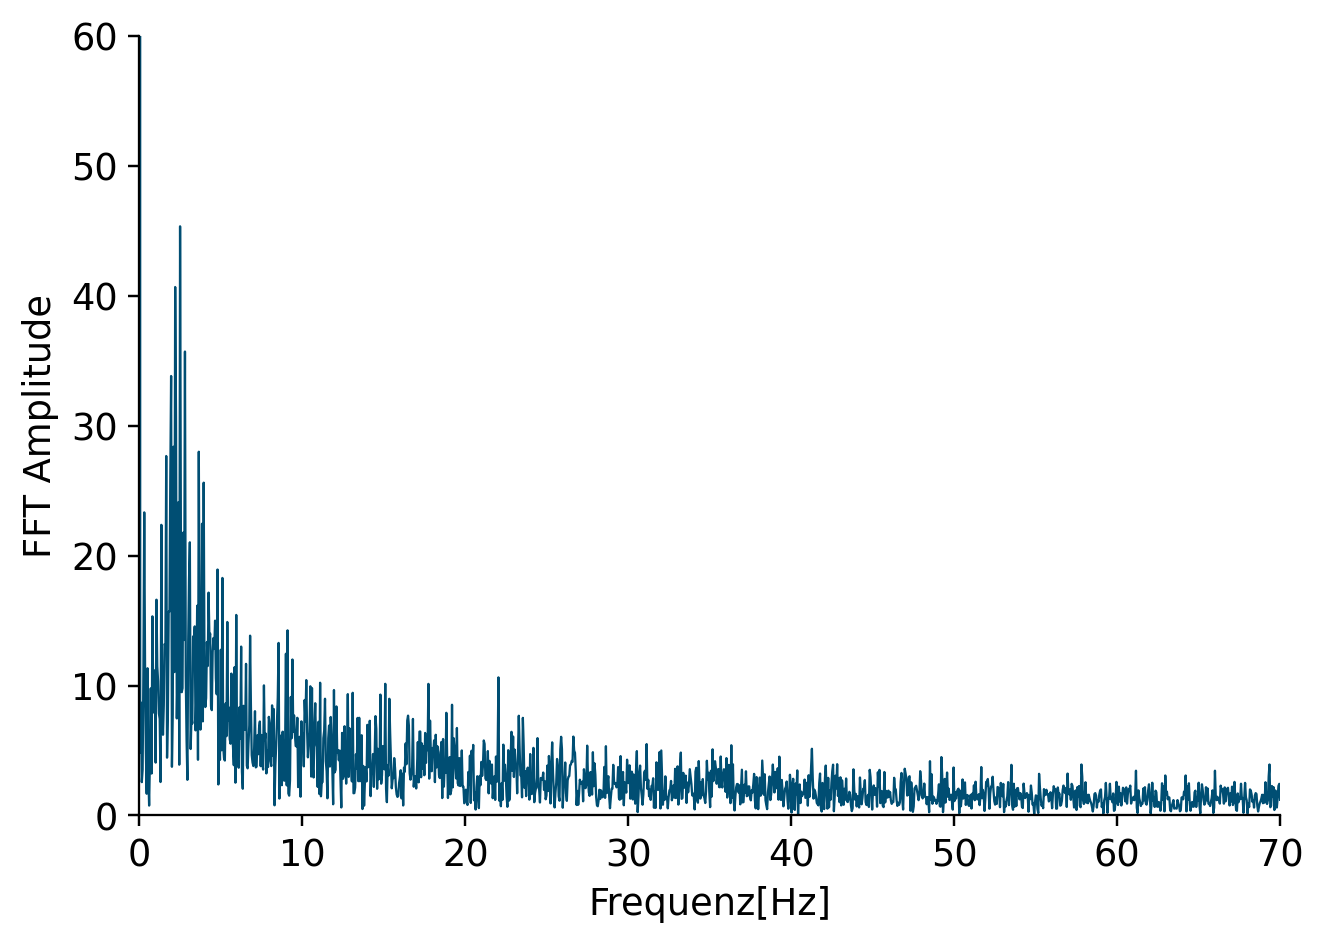

In [8]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

fftvalues = my_fft(interpolwerte[0],interpolwerte[1])
absl = np.abs(fftvalues[0])
fig, ax = plt.subplots(1,1)
ax.plot(fftvalues[1],absl)
ax.set_ylim(0,60)
ax.set_xlim(0,70)
xlab = "Frequenz[Hz]"
ylab = "FFT Amplitude"
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)



# Zweiter Versuch


##  Versuchsaufbau und -durchführung



- Bild von Aufbau des Haushaltsgegenstands:

<img src="Bilder/Versuch2.jpeg" width="500">

- Beschreibung des Aufbaus: Der Sensor wird an den Lautsprecher geklebt.
- Vorgangsbeschreibung: Das Messprogramm wird gestartet, sobald ein Lied über den Lautsprecher abgespielt wird.

## Versuchsauswertung



#### 1a. Einlesen der Mess- und Metadaten

In [9]:
path_measurement_folder = "measurement_data/data_20240109_182914_MaurizioFell_lautsprecher" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240109_182914_MaurizioFell_lautsprecher.h5" # replace None by the filename of the hdf5-file
"""Prepare Metadata"""

(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240109_182914_MaurizioFell_lautsprecher/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240109_182914_MaurizioFell_lautsprecher/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240109_182914_MaurizioFell_lautsprecher/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1ee847c5-6dd5-6ecf-aa58-0341b02a1b83": {
    "type": "probe",
    "name": "lautsprecher",
    "comment": "",
    "pat

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [10]:
dataset_path = "{}/{}".format(path_measurement_folder,h5_file_name )
f = h5py.File(dataset_path, "r")

length = len(f["RawData"][sensor_settings_dict["ID"]]["timestamp"])
arraytime = np.zeros(length)
arrayx = np.zeros(length)
arrayy = np.zeros(length)
arrayz = np.zeros(length)
for i in range(length):
    arraytime[i] = f["RawData"][sensor_settings_dict["ID"]]["timestamp"][i]
    arrayx[i] = f["RawData"][sensor_settings_dict["ID"]]["acceleration_x"][i]
    arrayy[i] = f["RawData"][sensor_settings_dict["ID"]]["acceleration_y"][i]
    arrayz[i] = f["RawData"][sensor_settings_dict["ID"]]["acceleration_z"][i]


#### 2. Betrag der Beschleunigung berechnen


In [11]:
betrag = get_vec_accel(arrayx,arrayy,arrayz)
print(betrag)

[13.73491273 17.75349324 17.89803661 ... 11.56493076 21.1908249
 13.05851066]


#### 3. Darstellung der Messdaten

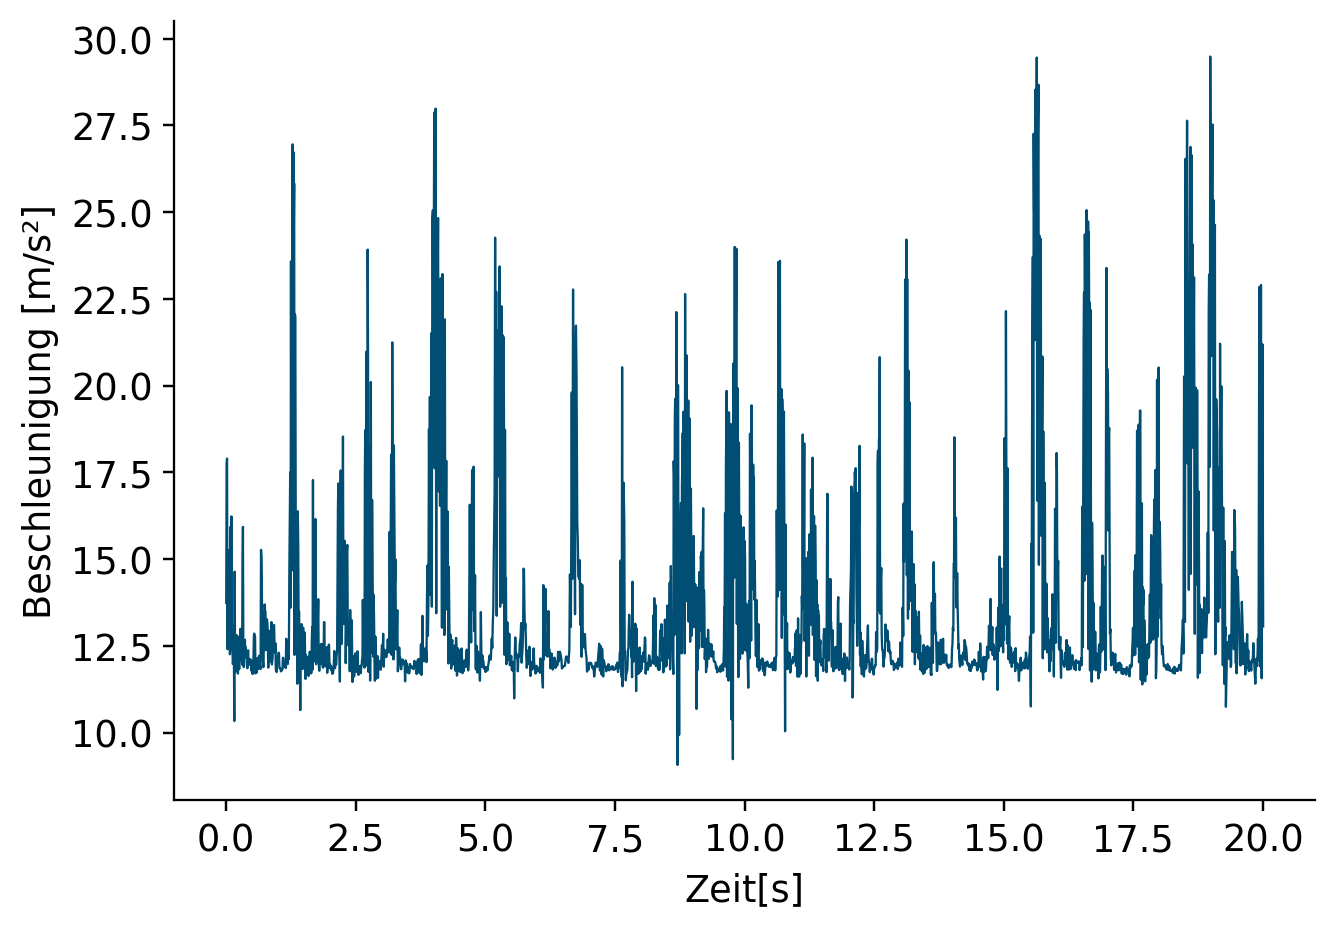

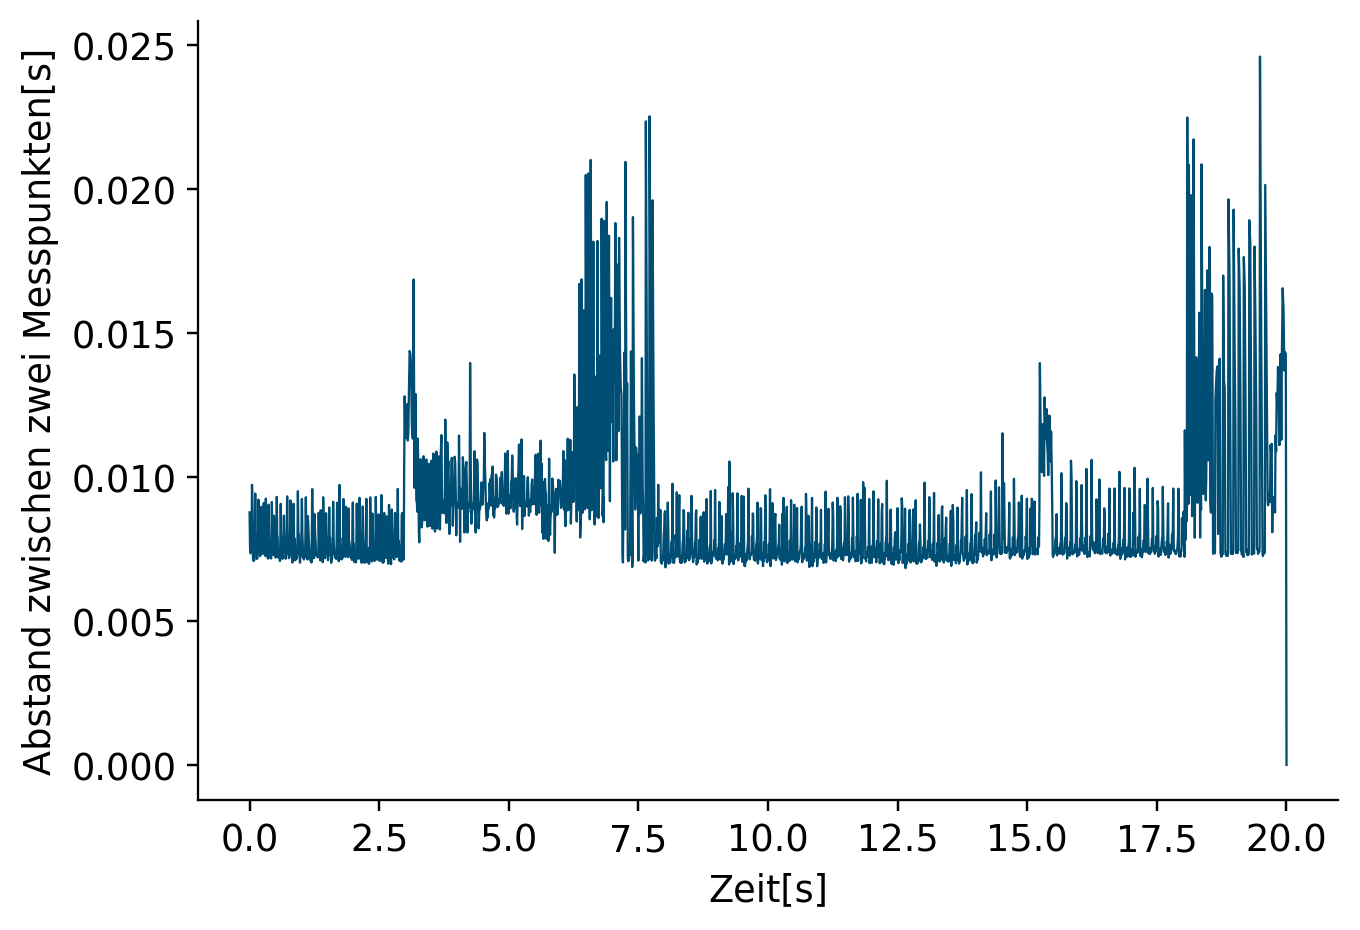

In [12]:
fig, ax = plt.subplots(1, 1)
fig, ax2 = plt.subplots(1, 1)
xlab = "Zeit[s]"
ylab = "Beschleunigung [m/s²]"
xlab2 = "Zeit[s]"
ylab2 = "Abstand zwischen zwei Messpunkten[s]"
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)
ax2.set_xlabel(xlab2)
ax2.set_ylabel(ylab2)
ax.plot(arraytime,betrag)
zabst = np.zeros(length)
for i in range(len(arraytime)):
    if i < len(arraytime)-1:
        zabst[i] = arraytime[i+1]-arraytime[i]
ax2.plot(arraytime, zabst)


#### 4. Interpolation der Messwerte



In [13]:
interpolwerte = interpolation(arraytime, betrag)


#### 5 & 6. FFT durchführen und graphisch darstellen


Text(0, 0.5, 'FFT Amplitude')

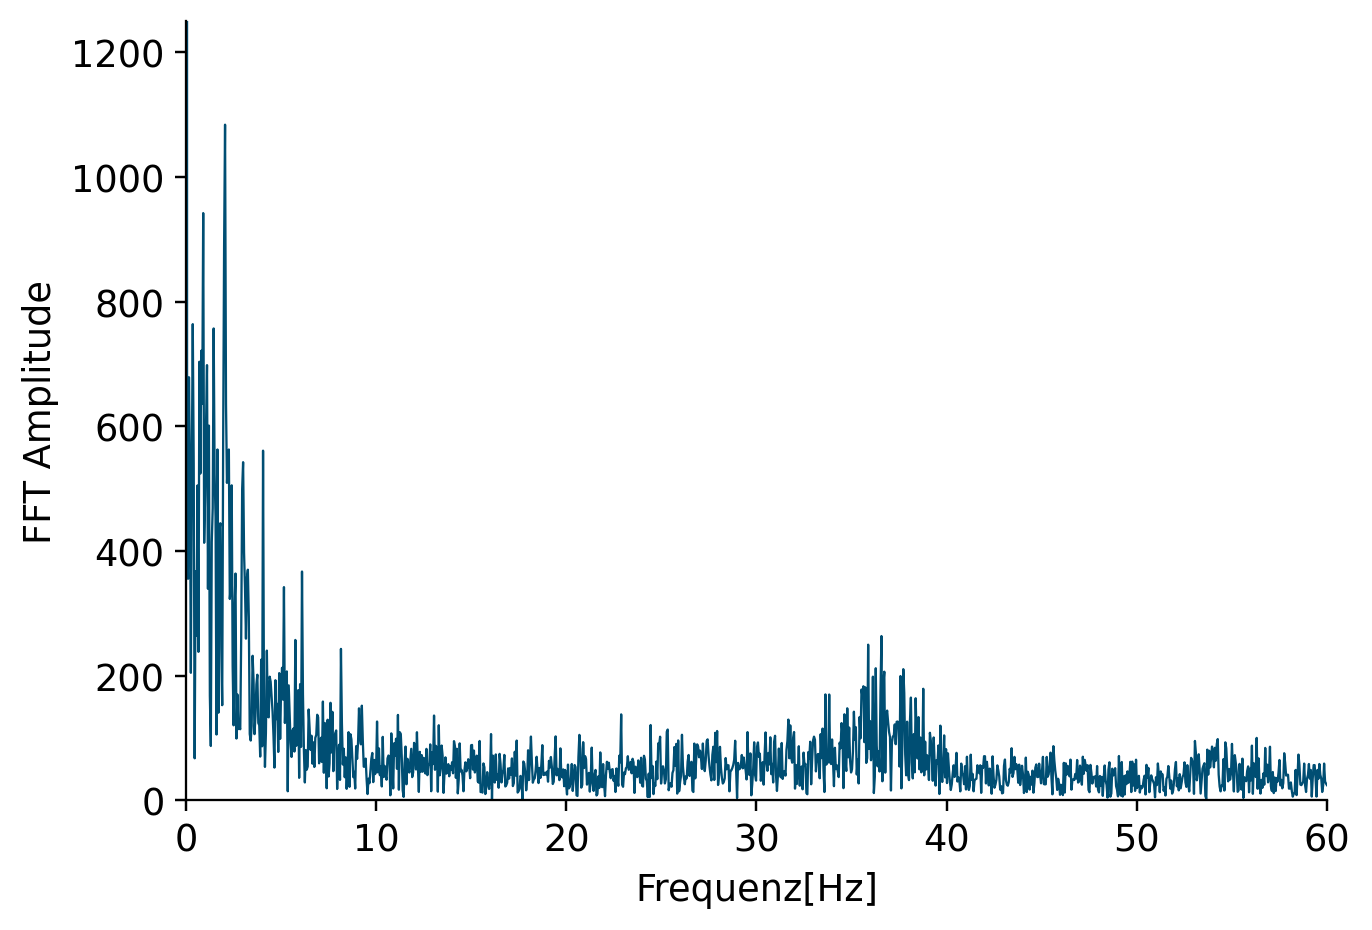

In [14]:

fftvalues = my_fft(interpolwerte[0],interpolwerte[1])
absl = np.abs(fftvalues[0])
fig, ax = plt.subplots(1,1)
ax.plot(fftvalues[1],absl)
ax.set_ylim(0,1250)
ax.set_xlim(0,60)
xlab = "Frequenz[Hz]"
ylab = "FFT Amplitude"
ax.set_xlabel(xlab)
ax.set_ylabel(ylab)

## Diskussion
Versuch 1: Im Beschleunigungsgraphen kann man gut die Weckerfunktion erkennen, da der Sensor periodisch pausiert und ausschlägt. Die Ausschläge sind relativ klein. Transformiert man die Beschleunigungen in den Frequenzbereich, fällt auf, dass bei etwa 3 bis 4 Hz die Amplitude den größten Ausschlag hat. Das liegt an dem verbauten Motor für die Weckervibrationsfunktion , welcher sich mit einer Frequenz in diesem Bereich dreht. Bei anderen Handymodellen kann es natürlich ein anderer Frequenzbereich sein.

Versuch 2: Im Beschleunigungsgraphen kann man große Ausschläge bis 30 m/s^2 erkennen. Zudem sind es auch recht viele Ausschläge. Da hier ein Lautsprecher verwendet wurde auf dem laute, basslastige Musik abgespielt wird, sind größere Ausschläge im Vgl. zum Handywecker zu erwarten. Transformiert man die Beschleunigungswerte in den Frequenzbereich, kann man erkennen, dass bei etwa 3 bis 4 Hz die größte Amplitude herrscht. Außerdem gibt es noch einen kleineren aber auffälligen Peak bei 35 bis 40 Hz. Der große Ausschlag bei 3 bis 4 Hz lässt sich dadurch erklären, dass der Lautsprecher in etwa diesem Frequenzbereich oszilliert. Der zweite Peak könnte durch sehr tiefe Töne kommen die vom abgespielten Lied abhängig sind. 

## Fazit
Der Versuch war meiner Meinung nach bisher der Interessanteste. Ich hatte anfangs Probleme beim Programmieren der FFT und Interpolation und musste mich erstmal tiefer mit dem Thema beschäftigen, um zu verstehen was genau ich eigentlich programmieren soll. Letztendlich habe ich bei dem Versuch einiges gelernt und hatte auch Spaß dabei.